# Joint fitting XRT and GBM data with XSPEC models

### Goals

3ML is designed to properly joint fit data from different instruments with thier instrument dependent likelihoods.
We demostrate this with joint fitting data from GBM and XRT while simultaneously showing hwo to use the XSPEC models form **astromodels**

### Setup

You must have you HEASARC initiated so that **astromodels** can find the XSPEC libraries. 




In [1]:
%matplotlib inline
from threeML import *
import os


WARNING CppInterfaceNotAvailable: The cthreeML package is not installed. You will not be able to use plugins which require the C/C++ interface (currently HAWC)


WARNING NaimaNotAvailable: The naima package is not available. Models that depend on it will not be available



Loading xspec models...


WARNING RuntimeWarning: The current value of the parameter switch was above the new maximum 1.0.


WARNING RuntimeWarning: The current value of the parameter specfile was above the new maximum 1.0.



done



WARNING UserWarning: ROOT minimizer not available



Configuration read from /Users/jburgess/.threeML/threeML_config.yml



WARNING RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility


WARNING RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility


WARNING RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88


WARNING RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192, got 176


WARNING RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88


WARNING RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192, got 176


WARNING RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88


WARNING RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192, got 176


WARNING RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility


WARNING RuntimeWarning: numpy.ufunc size changed, may indicate binary incom

## Load XRT data

Make a likelihood for the XRT including all the appropriate files

Now using 971 channels out of 1024


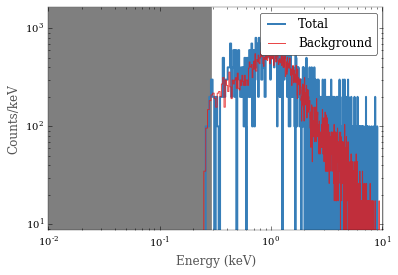

In [2]:
trigger="GRB110731A"
dec=-28.546
ra=280.52
xrt_dir='xrt'
xrt = SwiftXRTLike("XRT",os.path.join(xrt_dir,"xrt_src.pha"),
                   os.path.join(xrt_dir,"xrt_bkg.pha"),
                   os.path.join(xrt_dir,"xrt.rmf"),
                   os.path.join(xrt_dir,"xrt.arf"))

xrt.set_active_measurements("0.3-10.0")
xrt.view_count_spectrum()

## Load GBM data

Load all the GBM data you need and make appropriate background, source time, and energy selections. Make sure to check the light curves! 

In [3]:

gbm_dir=os.path.join('gbm','bn110731A')

# Select the time interval
src_selection = "100.169342-150.169342"

nai3 = FermiGBMLikeTTE('NAI3',
                         os.path.join(gbm_dir,"glg_tte_n3_bn110731465_v00.fit"),
                         "20-90,160-250", # background selection
                         src_selection,          # source interval
                         rspfile=os.path.join(gbm_dir, "glg_cspec_n3_bn110731465_v00.rsp2"))



WARNING VisibleDeprecationWarning: converting an array with ndim > 0 to an index will result in an error in the future


WARNING VisibleDeprecationWarning: converting an array with ndim > 0 to an index will result in an error in the future


WARNING FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.




Looking for optimal polynomial grade:

delta log-likelihoods:
0 -> 1: delta Log-likelihood = 145.670923776
1 -> 2: delta Log-likelihood = 4.82461856212
2 -> 3: delta Log-likelihood = 0.00878000678495
3 -> 4: delta Log-likelihood = 1.3723357073



View the light curve

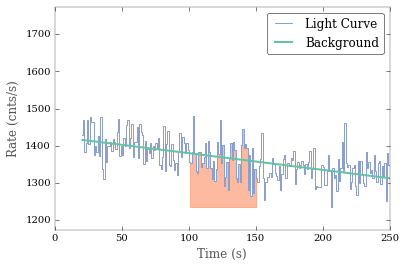

In [4]:
nai3.view_lightcurve(20,250)

Make energy selections and check them out

Now using 120 channels out of 128


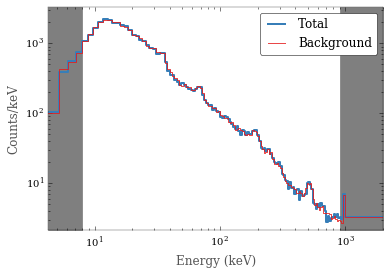

In [5]:
nai3.set_active_measurements("8-900")
nai3.view_count_spectrum()

## Setup the model

**astromodels** allows you to use XSPEC models if you have XSPEC installed.
Set all the normal parameters you would in XSPEC and build a model the normal **3ML/astromodel** way!


In [6]:
xspec_abund('angr')

spectral_model =  XS_phabs()* XS_zphabs() * XS_powerlaw()


spectral_model.nh_1=0.101
spectral_model.nh_1.fix = True

spectral_model.nh_2=0.1114424
spectral_model.nh_2.fix = True

spectral_model.redshift_2 = 0.618
spectral_model.redshift_2.fix =True

In [7]:
spectral_model.display()

* description: ((XS_phabs{1} * XS_zphabs{2}) * XS_powerlaw{3})
  * formula: (no latex formula available)
  * parameters: 
    * nh_1: 
      * value: 0.101
      * desc: (see https://heasarc.gsfc.nasa.gov/xanadu/xspec/manual/XspecModels.html)
      * min_value: 0.0
      * max_value: 1000000.0
      * unit: 1e+22
      * delta: 0.001
      * free: False
    * nh_2: 
      * value: 0.1114424
      * desc: (see https://heasarc.gsfc.nasa.gov/xanadu/xspec/manual/XspecModels.html)
      * min_value: 0.0
      * max_value: 1000000.0
      * unit: 1e+22
      * delta: 0.001
      * free: False
    * redshift_2: 
      * value: 0.618
      * desc: (see https://heasarc.gsfc.nasa.gov/xanadu/xspec/manual/XspecModels.html)
      * min_value: -0.999
      * max_value: 10.0
      * unit: 
      * delta: 0.01
      * free: False
    * phoindex_3: 
      * value: 1.0
      * desc: (see https://heasarc.gsfc.nasa.gov/xanadu/xspec/manual/XspecModels.html)
      * min_value: -3.0
      * max_value: 10.0
      * unit: 
      * delta: 0.01
      * free: True
    * norm_3: 
      * value: 1.0
      * desc: (see https://heasarc.gsfc.nasa.gov/xanadu/xspec/manual/XspecModels.html)
      * min_value: 0.0
      * max_value: None
      * unit: keV / (cm2 s)
      * delta: 0.1
      * free: True

## Setup the joint likelihood

Create a point source object and model. 

Load the data into a data list and create the joint likelihood


In [8]:
ptsrc = PointSource(trigger,ra,dec,spectral_shape=spectral_model)
model = Model(ptsrc)

data = DataList(xrt,nai3)

jl = JointLikelihood(model, data, verbose=False)
model.display()

name,value,min_value,max_value,unit,delta,free
GRB110731A.spectrum.main.composite.phoindex_3,1.0,-3.0,10.0,,0.01,True
GRB110731A.spectrum.main.composite.norm_3,1.0,0.0,None,keV / (cm2 s),0.1,True


## Fitting

### Maximum Likelihood style

In [10]:
res = jl.fit()


WARNING RuntimeWarning: Exception Occured 
fcn is called with following arguments:
    GRB110731A_spectrum_main_composite_phoindex_3 = +1.000000
        GRB110731A_spectrum_main_composite_norm_3 = +1.000000




TypeError: unsupported operand type(s) for *: 'NoneType' and 'NoneType'

RuntimeError: You need to run a fit before accessing the covariance matrix

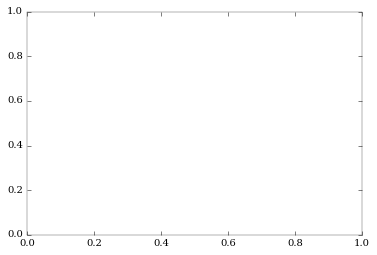

In [11]:
spec_plot_mle = SpectralPlotter(jl)
spec_plot_mle.plot_model(x_unit='keV',
                         y_unit='erg2/(cm2 keV s)',
                         ene_min=10.,
                         ene_max=1E4,
                         loc='lower left',
                         lw=.5,
                         ls='-')

In [22]:
res = jl.get_errors()

Name,Value,Unit
GRB110731A.spectrum.main.composite.phoindex_3,2.05 -0.05 +0.06,
GRB110731A.spectrum.main.composite.norm_3,0.209 -0.008 +0.009,keV / (cm2 s)


In [23]:
res = jl.get_contours(spectral_model.phoindex_3,1.5,2.5,50)

AttributeError: 'NoneType' object has no attribute 'split'

In [24]:
res = jl.get_contours(spectral_model.norm_3,.1,.3,25,spectral_model.phoindex_3,1.5,2.5,50)

AssertionError: Requested hi range for parameter GRB110731A.spectrum.main.composite.norm_3 (0.3) is above parameter maximum (None)

### And then go Bayesian!

In [8]:
spectral_model.phoindex_3.prior = Uniform_prior(lower_bound=-5.0, upper_bound=5.0)
spectral_model.norm_3.prior = Log_uniform_prior(lower_bound=1E-5, upper_bound=1)

In [9]:
bayes = BayesianAnalysis(model, data)

In [10]:
samples = bayes.sample(n_walkers=50,burn_in=100, n_samples=500)

Running burn-in of 100 samples...


Sampling...


Mean acceptance fraction: 0.708


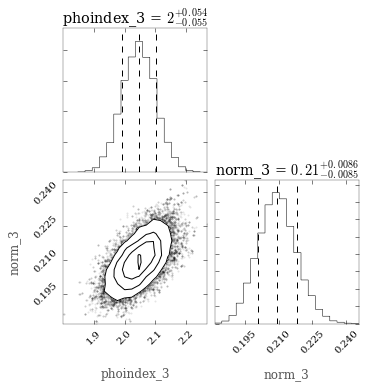

In [11]:
fig = bayes.corner_plot(plot_contours=True, plot_density=False)


In [12]:
fig = bayes.corner_plot_cc(figsize='GROW')

['phoindex_3', 'norm_3']


RuntimeError: LaTeX was not able to process the following string:
'norm_3 '
Here is the full report generated by LaTeX: 

This is pdfTeX, Version 3.14159265-2.6-1.40.16 (TeX Live 2015) (preloaded format=latex)
 restricted \write18 enabled.
entering extended mode
(./4064a5729e98cbf0c3d0d4215b6e8748.tex
LaTeX2e <2016/03/31>
Babel <3.9q> and hyphenation patterns for 81 language(s) loaded.
(/usr/local/texlive/2015/texmf-dist/tex/latex/base/article.cls
Document Class: article 2014/09/29 v1.4h Standard LaTeX document class
(/usr/local/texlive/2015/texmf-dist/tex/latex/base/size10.clo))
(/usr/local/texlive/2015/texmf-dist/tex/latex/type1cm/type1cm.sty)
(/usr/local/texlive/2015/texmf-dist/tex/latex/psnfss/helvet.sty
(/usr/local/texlive/2015/texmf-dist/tex/latex/graphics/keyval.sty))
(/usr/local/texlive/2015/texmf-dist/tex/latex/psnfss/courier.sty)
(/usr/local/texlive/2015/texmf-dist/tex/latex/base/textcomp.sty
(/usr/local/texlive/2015/texmf-dist/tex/latex/base/ts1enc.def))
(/usr/local/texlive/2015/texmf-dist/tex/latex/geometry/geometry.sty
(/usr/local/texlive/2015/texmf-dist/tex/generic/oberdiek/ifpdf.sty)
(/usr/local/texlive/2015/texmf-dist/tex/generic/oberdiek/ifvtex.sty)
(/usr/local/texlive/2015/texmf-dist/tex/generic/ifxetex/ifxetex.sty)

Package geometry Warning: Over-specification in `h'-direction.
    `width' (5058.9pt) is ignored.


Package geometry Warning: Over-specification in `v'-direction.
    `height' (5058.9pt) is ignored.

)
No file 4064a5729e98cbf0c3d0d4215b6e8748.aux.
(/usr/local/texlive/2015/texmf-dist/tex/latex/base/ts1cmr.fd)
(/usr/local/texlive/2015/texmf-dist/tex/latex/psnfss/ot1pnc.fd)
*geometry* driver: auto-detecting
*geometry* detected driver: dvips
! Missing $ inserted.
<inserted text> 
                $
l.12 ...size{14.000000}{17.500000}{\rmfamily norm_
                                                  3 }
! Extra }, or forgotten $.
l.12 ...e{14.000000}{17.500000}{\rmfamily norm_3 }
                                                  
! Missing $ inserted.
<inserted text> 
                $
l.13 \end{document}
                   
[1] (./4064a5729e98cbf0c3d0d4215b6e8748.aux) )
(\end occurred inside a group at level 1)

### simple group (level 1) entered at line 12 ({)
### bottom level
(see the transcript file for additional information)
Output written on 4064a5729e98cbf0c3d0d4215b6e8748.dvi (1 page, 292 bytes).
Transcript written on 4064a5729e98cbf0c3d0d4215b6e8748.log.


In [110]:
bayes.get_highest_density_interval()

Name,Value,Unit
GRB110731A.spectrum.main.composite.phoindex_3,2.05 -0.11 +0.11,
GRB110731A.spectrum.main.composite.norm_3,0.209 -0.016 +0.016,keV / (cm2 s)


OrderedDict([('GRB110731A.spectrum.main.composite.phoindex_3',
              {'lower bound': 1.9420550721054672,
               'median': 2.0473012995313451,
               'upper bound': 2.1563300384857449}),
             ('GRB110731A.spectrum.main.composite.norm_3',
              {'lower bound': 0.19311281485537479,
               'median': 0.20935989107363939,
               'upper bound': 0.22576779703065428})])